<a href="https://colab.research.google.com/github/adawy2050/mycodes/blob/main/Carnegie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-40-d682bca0d312>:60: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


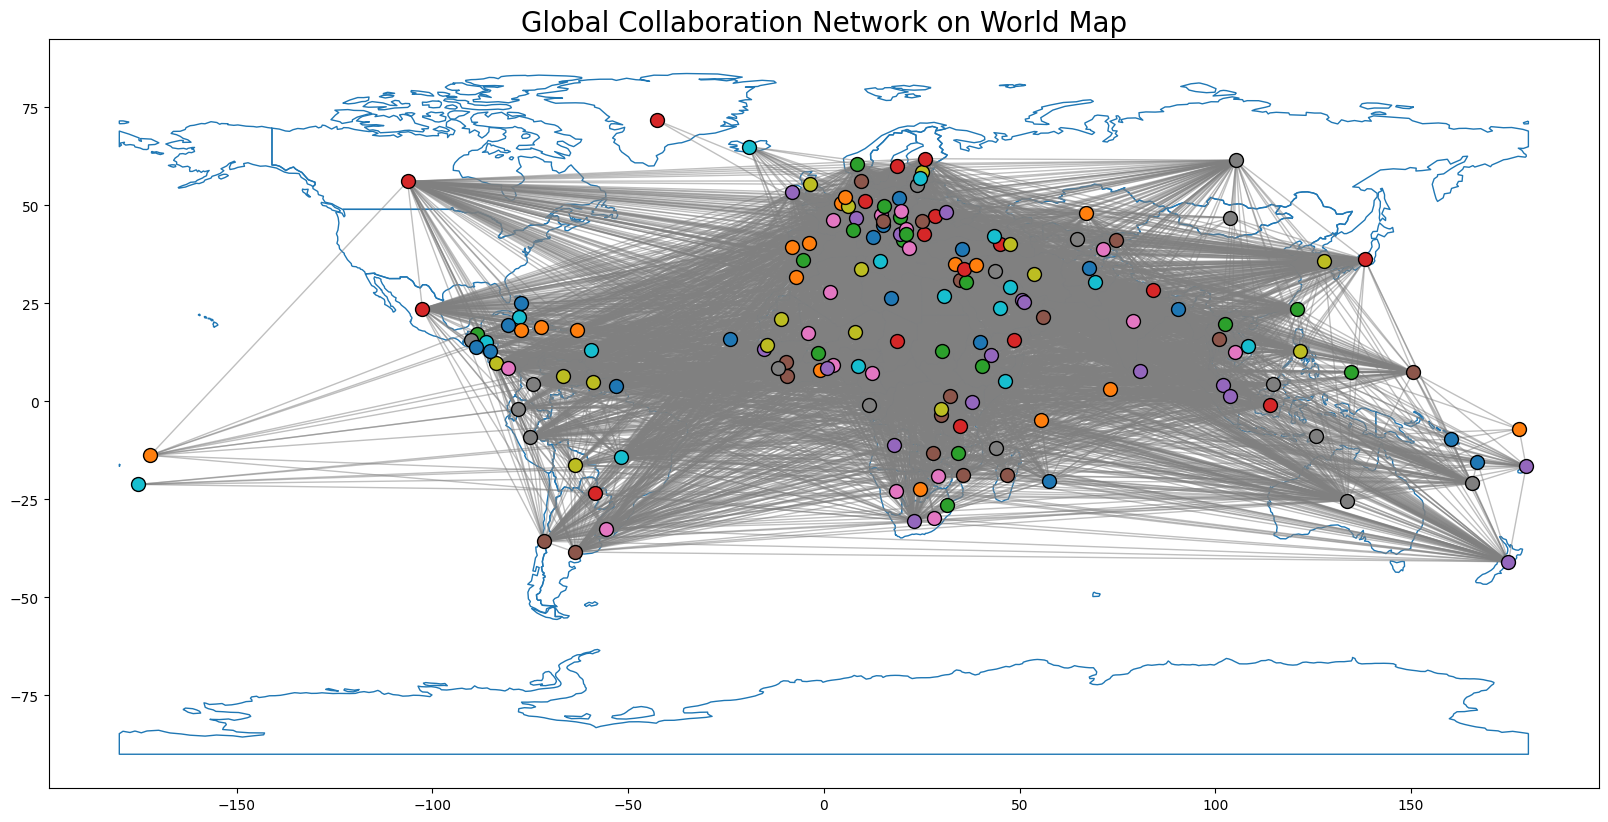

In [40]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Split by commas and take the last element
            parts = affiliation.split(',')
            if len(parts) > 1:
                country = parts[-1].strip()
                countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]
        plt.plot([x1, x2], [y1, y2], color='gray', linewidth=1, alpha=0.5)

for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global Collaboration Network on World Map", fontsize=20)
plt.show()


<ipython-input-42-4d555118336e>:76: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


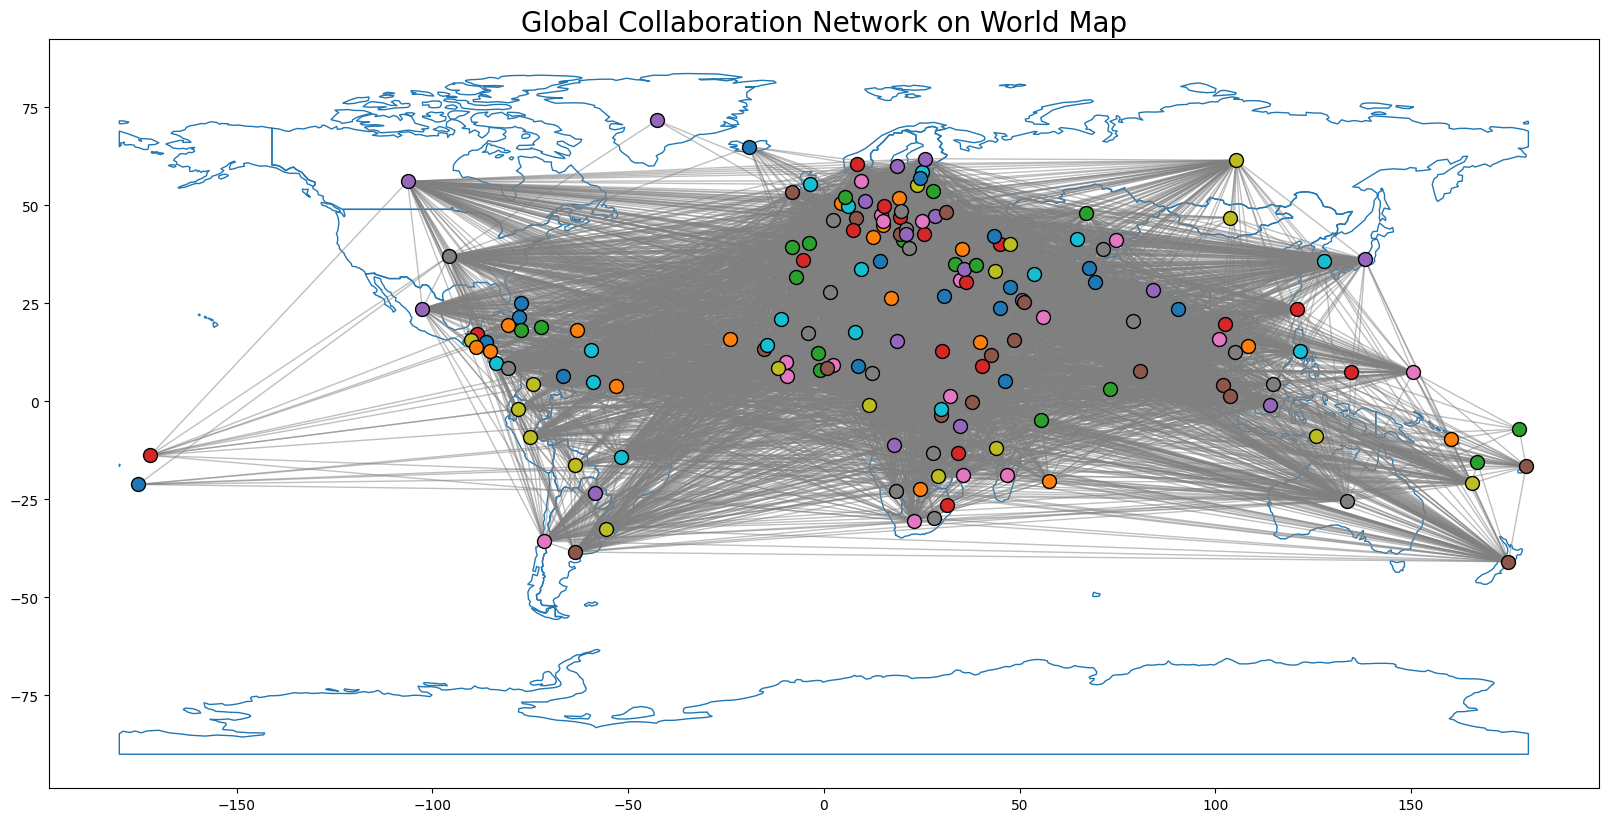

In [42]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()
    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]
        plt.plot([x1, x2], [y1, y2], color='gray', linewidth=1, alpha=0.5)

for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global Collaboration Network on World Map", fontsize=20)
plt.show()


<ipython-input-43-0e943c83aaf5>:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


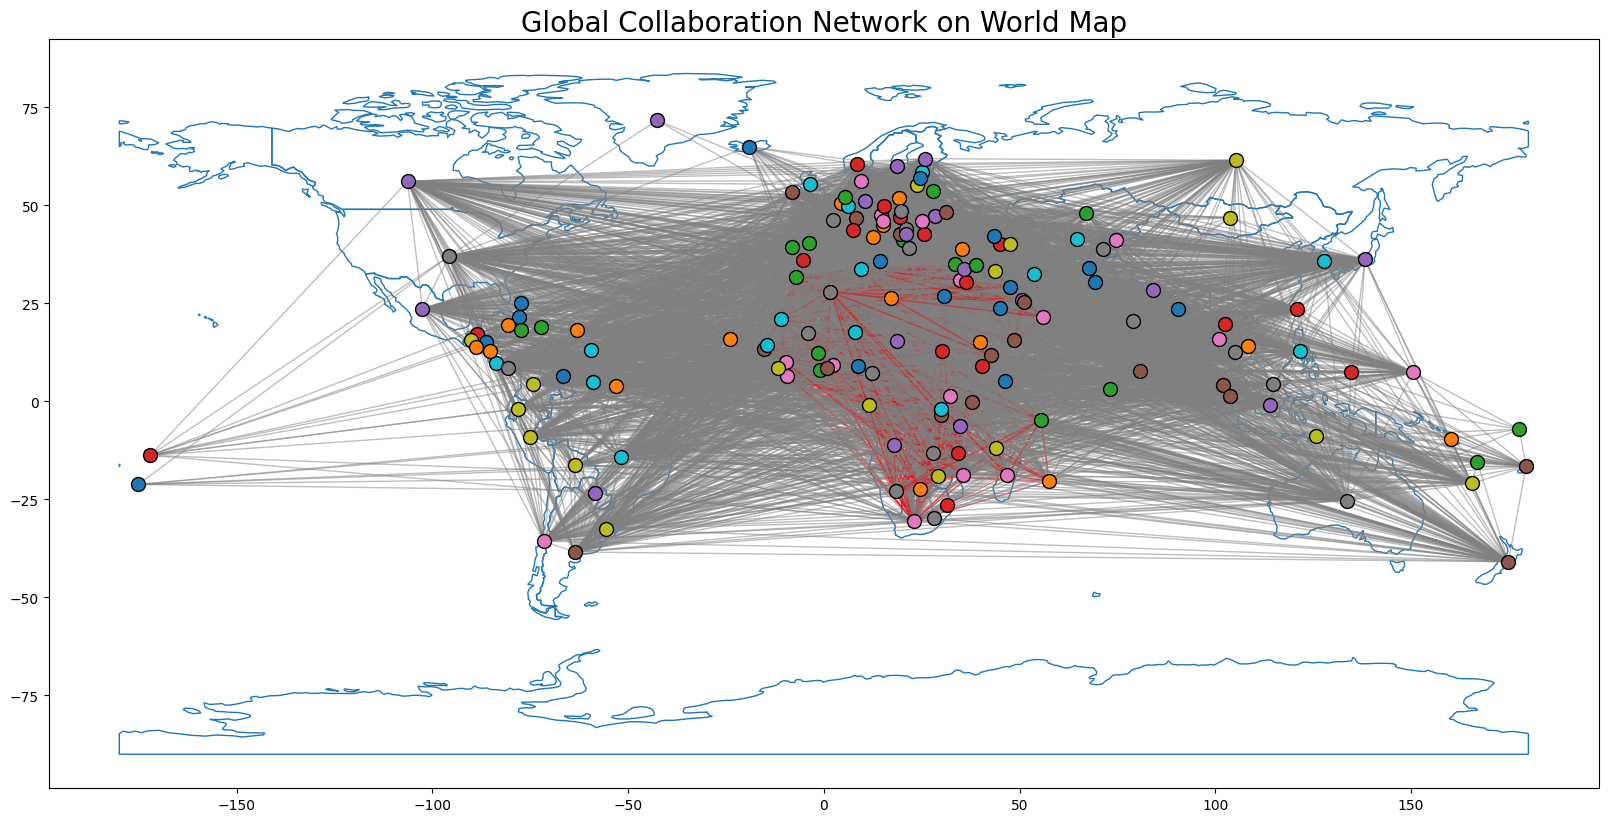

In [43]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()
    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries):
            edge_color = 'red'  # Studies within Africa or MENA
        else:
            edge_color = 'gray'  # Studies involving other regions

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=1, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global Collaboration Network on World Map", fontsize=20)
plt.show()


<ipython-input-46-cb57114d2cb8>:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


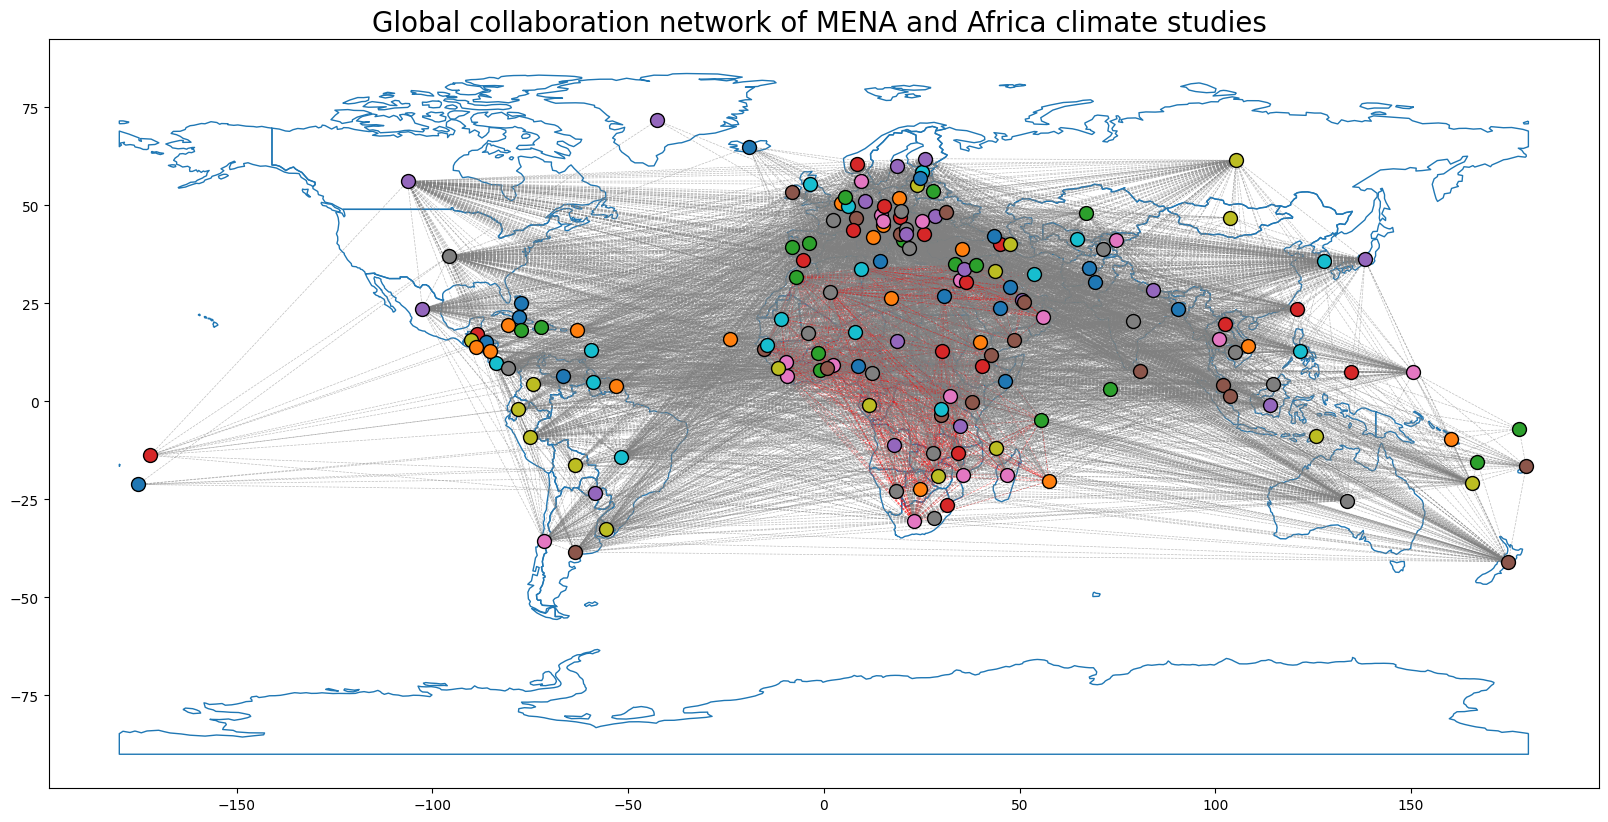

In [46]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()
    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color and style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries):
            edge_color = 'red'  # Studies within Africa or MENA
            line_style = '--'
            line_width = 0.5
        else:
            edge_color = 'gray'  # Studies involving other regions
            line_style = '--'    # Dashed line
            line_width = 0.5     # Thin line

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=line_width, linestyle=line_style, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global collaboration network of MENA and Africa climate studies ", fontsize=20)
plt.show()


<ipython-input-47-1a4255f54eac>:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


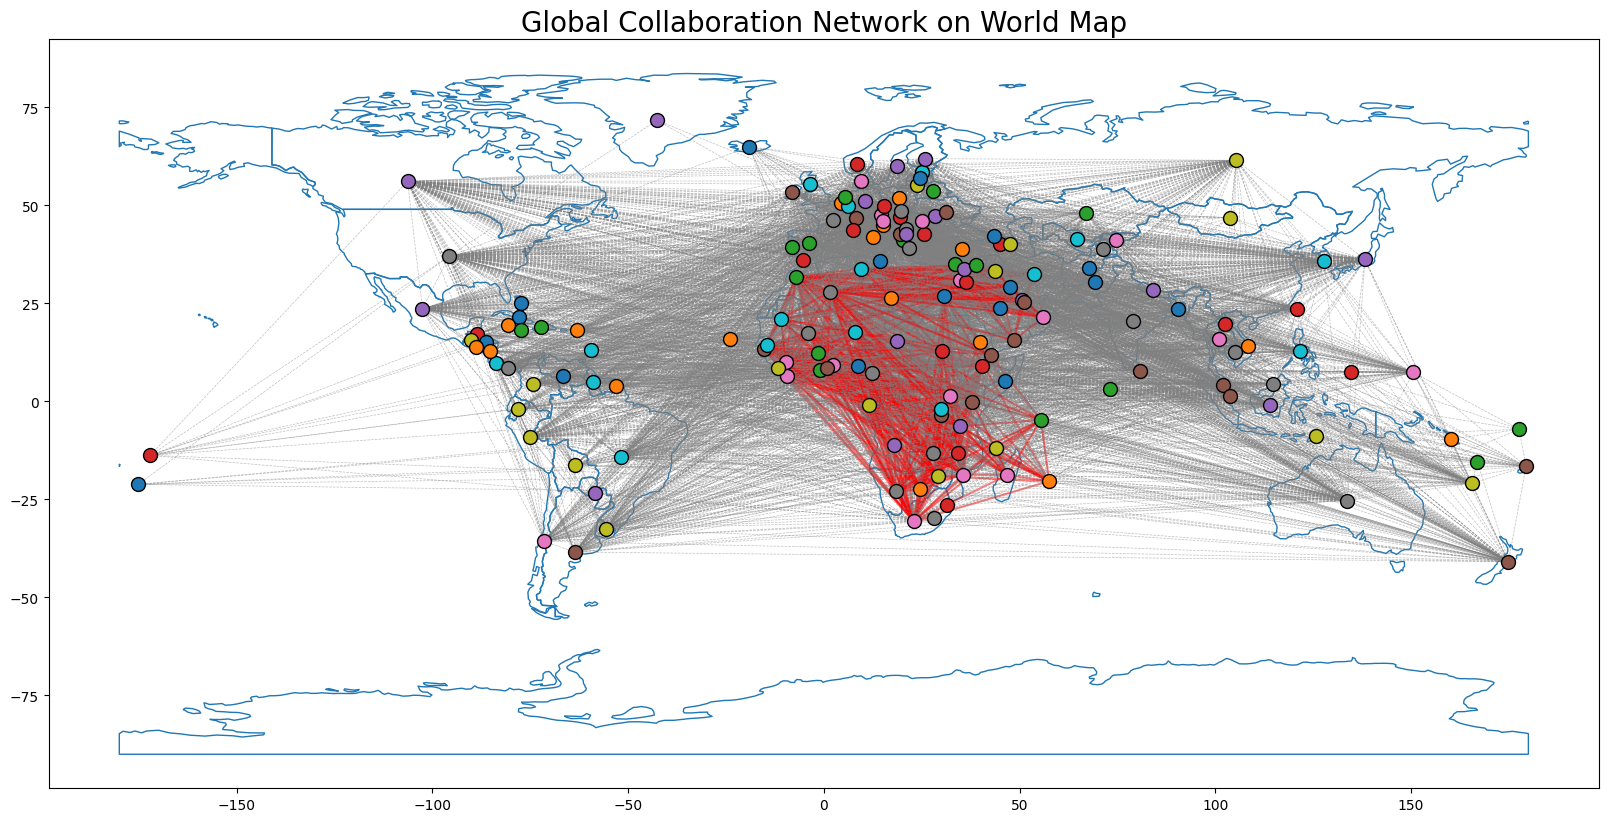

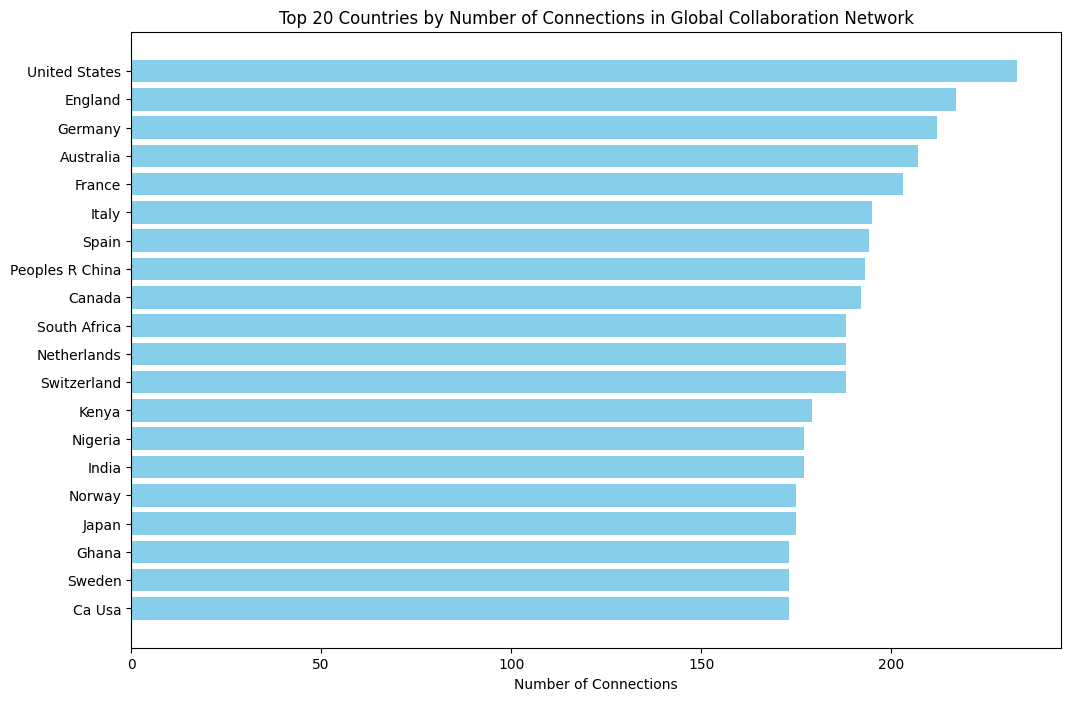

In [47]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()
    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color and style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries):
            edge_color = 'red'  # Studies within Africa or MENA
            line_style = '-'
            line_width = 1.5
        else:
            edge_color = 'gray'  # Studies involving other regions
            line_style = '--'    # Dashed line
            line_width = 0.5     # Thin line

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=line_width, linestyle=line_style, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global collaboration network of MENA and Africa climate studies", fontsize=20)
plt.show()

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 countries
top_countries = sorted_countries[:20]
countries, connections = zip(*top_countries)

# Plot a bar chart of the top 20 countries by number of connections
plt.figure(figsize=(12, 8))
plt.barh(countries, connections, color='skyblue')
plt.xlabel('Number of Connections')
plt.title('Top 20 Countries by Number of Connections in Global Collaboration Network')
plt.gca().invert_yaxis()  # Invert y-axis to show the country with the most connections at the top
plt.show()


<ipython-input-58-b904ce1e4835>:96: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


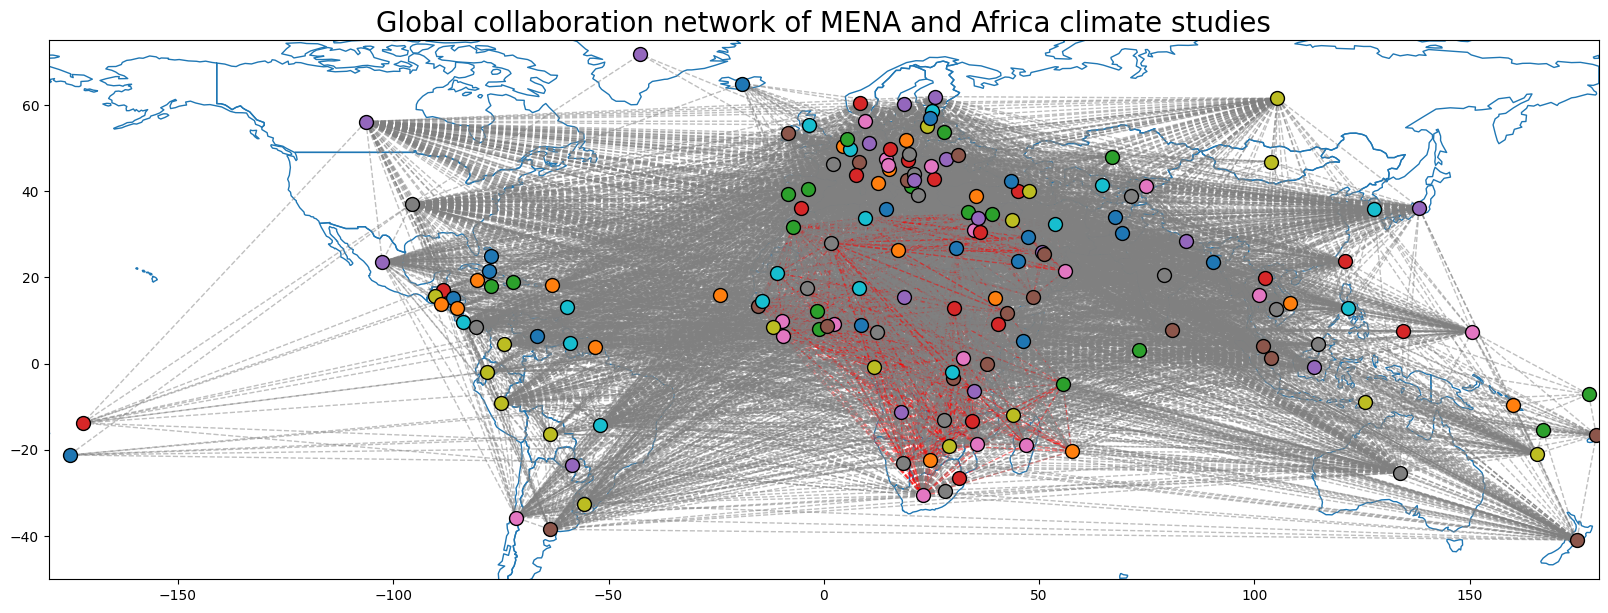

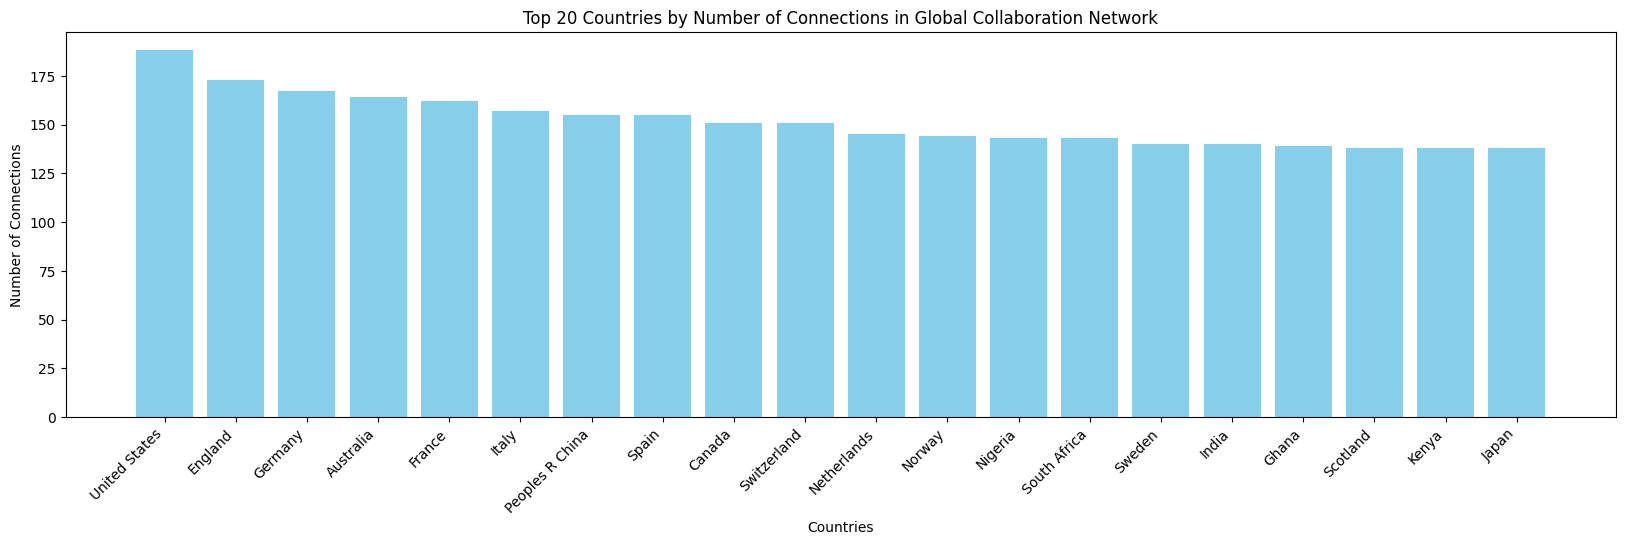

In [58]:
# Install necessary packages if not already installed
!pip install geopandas

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()

    # Check for patterns like "Ca Usa" or "NY USA" and map to "United States"
    if re.match(r'\b[A-Z]{2}\s*USA\b', normalized_name, re.IGNORECASE):
        return "United States"

    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map within the latitude bounds
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)
ax.set_xlim(-180, 180)   # Full longitude range
ax.set_ylim(-50, 75)     # Limit latitude from -50 to 75

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color and style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries):
            edge_color = 'red'  # Studies within Africa or MENA
            line_style = '--'
            line_width = 1.0
        else:
            edge_color = 'gray'  # Studies involving other regions
            line_style = '--'    # Dashed line
            line_width = 1.0     # Thin line

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=line_width, linestyle=line_style, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, label=country, edgecolor='k', zorder=5)

plt.title("Global collaboration network of MENA and Africa climate studies", fontsize=20)
plt.show()

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 countries
top_countries = sorted_countries[:20]
countries, connections = zip(*top_countries)

# Plot a bar chart of the top 20 countries by number of connections
plt.figure(figsize=(20, 5))
plt.bar(countries, connections, color='skyblue')
plt.ylabel('Number of Connections')
plt.xlabel('Countries')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.title('Top 20 Countries by Number of Connections in Global Collaboration Network')
plt.show()


<ipython-input-60-bac281a262ea>:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', 20)
<ipython-input-60-bac281a262ea>:109: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


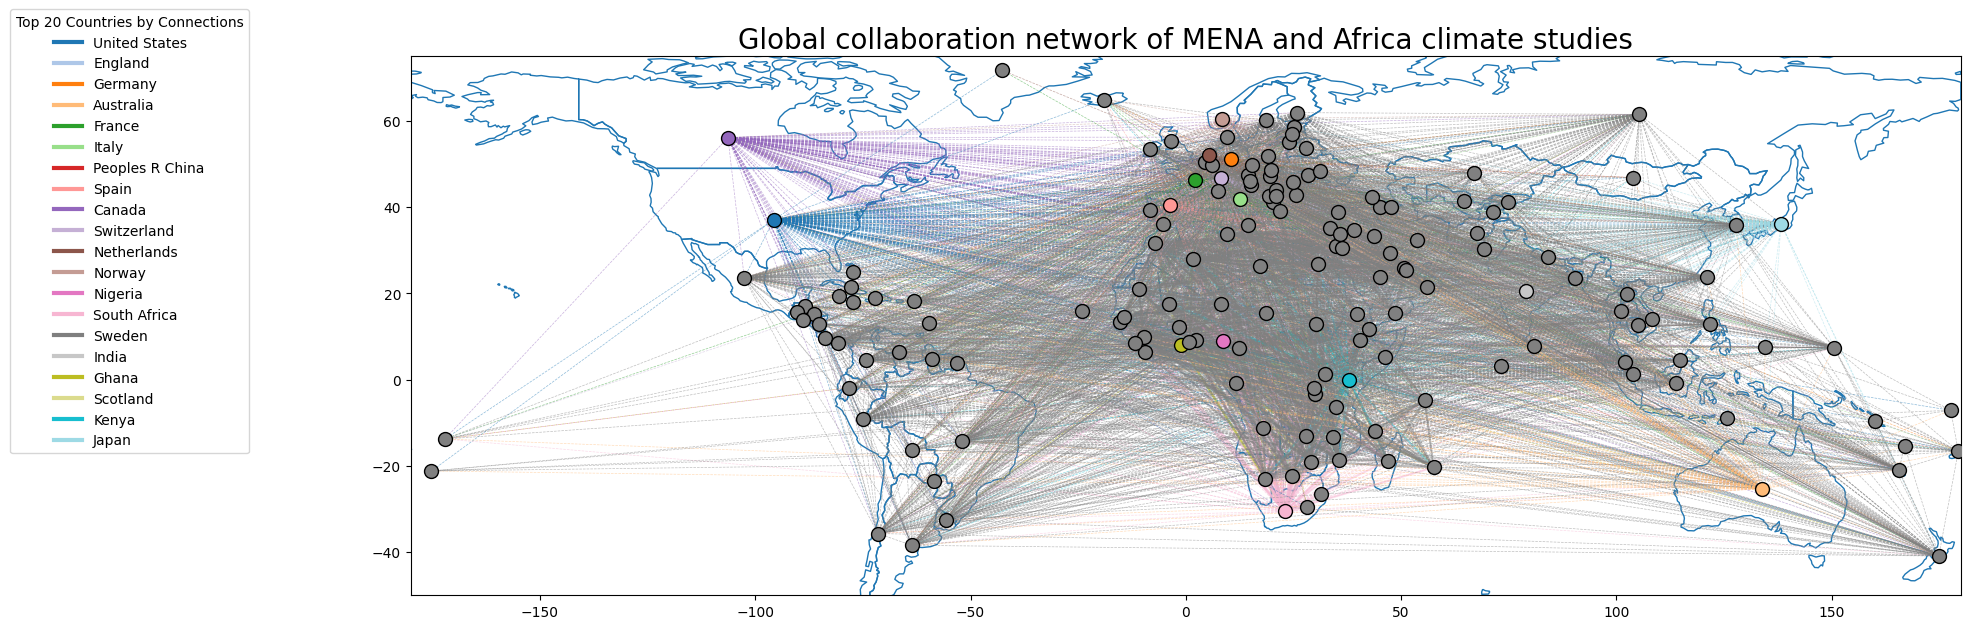

In [60]:
# Install necessary packages if not already installed
!pip install geopandas matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re
import numpy as np

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()

    # Check for patterns like "Ca Usa" or "NY USA" and map to "United States"
    if re.match(r'\b[A-Z]{2}\s*USA\b', normalized_name, re.IGNORECASE):
        return "United States"

    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 countries
top_countries = sorted_countries[:20]
top_country_names = [country for country, _ in top_countries]

# Assign unique colors for the top 20 countries
color_map = plt.cm.get_cmap('tab20', 20)
country_colors = {country: color_map(i) for i, country in enumerate(top_country_names)}

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map within the latitude bounds
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1)
ax.set_xlim(-180, 180)   # Full longitude range
ax.set_ylim(-50, 75)     # Limit latitude from -50 to 75

# Plot the graph on top of the world map
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color based on the source country
        edge_color = country_colors.get(edge[0], 'gray') if edge[0] in top_country_names else 'gray'

        # Determine the edge style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries):
            line_style = '-'
            line_width = 1.5
        else:
            line_style = '--'  # Dashed line
            line_width = 0.5   # Thin line

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=line_width, linestyle=line_style, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, color=country_colors.get(country, 'gray'), edgecolor='k', zorder=5)

# Create legend for top 20 countries
handles = [plt.Line2D([0], [0], color=country_colors[country], lw=3) for country in top_country_names]
labels = top_country_names

# Position legend in the ocean west of the USA
plt.legend(handles, labels, title="Top 20 Countries by Connections", loc='upper right', bbox_to_anchor=(-0.1, 1.1), fontsize=10)

plt.title("Global collaboration network of MENA and Africa climate studies", fontsize=20)
plt.show()


<ipython-input-66-7dde7fe5b2f5>:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', 20)
<ipython-input-66-7dde7fe5b2f5>:120: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


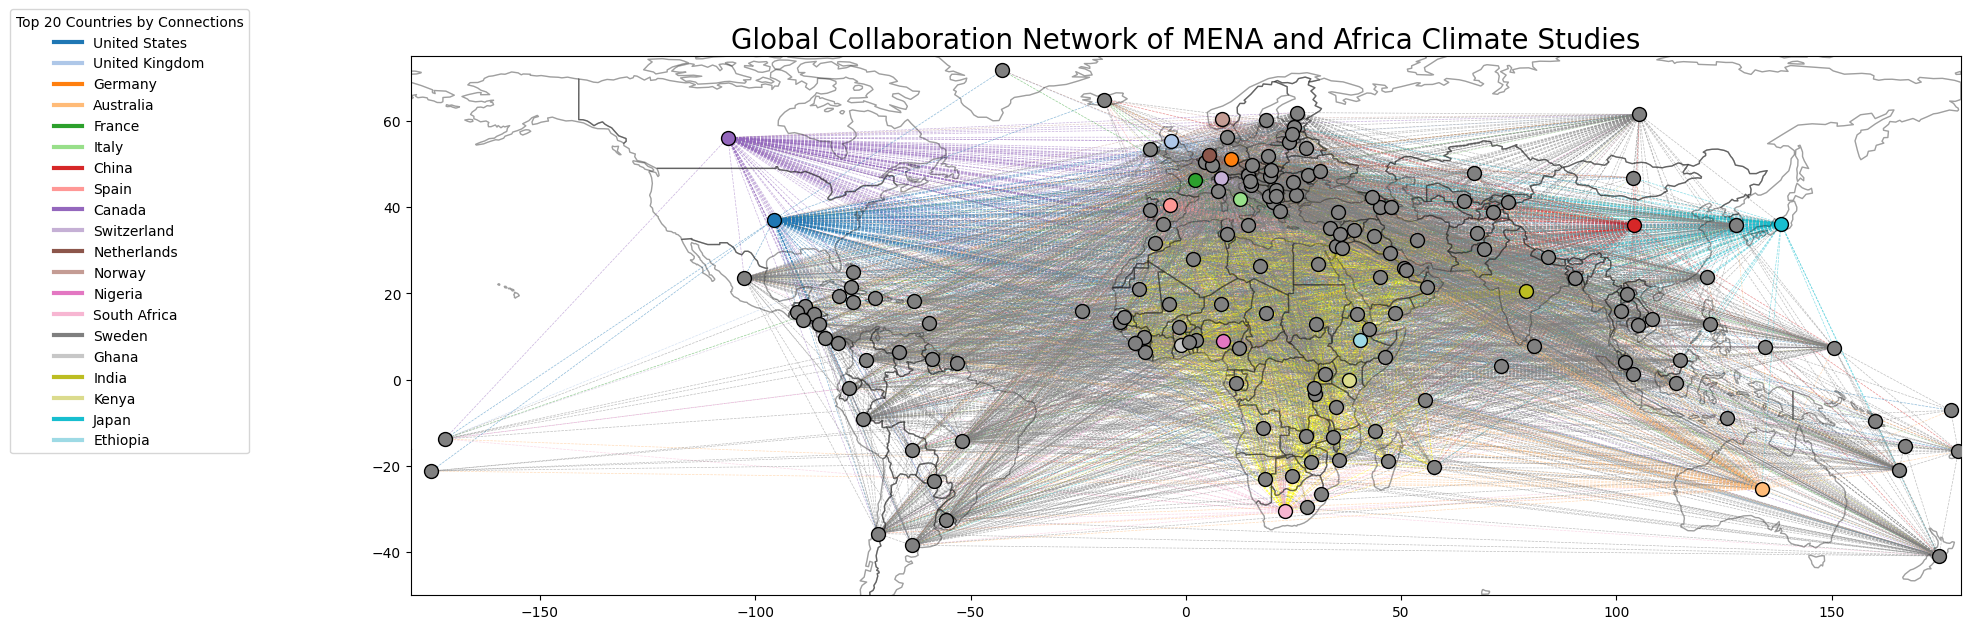

In [66]:
# Install necessary packages if not already installed
!pip install geopandas matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re
import numpy as np

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        "england": "United Kingdom",
        "scotland": "United Kingdom",
        "wales": "United Kingdom",
        "northern ireland": "United Kingdom",
        "uk": "United Kingdom",
        "britain": "United Kingdom",
        "peoples r china": "China",
        "pr china": "China",
        "china, pr": "China",
        "china": "China",
        "people's republic of china": "China",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()

    # Check for patterns like "Ca Usa" or "NY USA" and map to "United States"
    if re.match(r'\b[A-Z]{2}\s*USA\b', normalized_name, re.IGNORECASE):
        return "United States"

    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 countries
top_countries = sorted_countries[:20]
top_country_names = [country for country, _ in top_countries]

# Assign unique colors for the top 20 countries
color_map = plt.cm.get_cmap('tab20', 20)
country_colors = {country: color_map(i) for i, country in enumerate(top_country_names)}

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map within the latitude bounds
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the graph first
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color based on the source country
        edge_color = country_colors.get(edge[0], 'gray') if edge[0] in top_country_names else 'gray'

        # Determine the edge style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries) or \
           (edge[0] in africa_countries and edge[1] in mena_countries) or \
           (edge[0] in mena_countries and edge[1] in africa_countries):
            edge_color = 'yellow'
            line_style = '--'  # Solid line for MENA and Africa connections
            line_width = 0.5
        else:
            line_style = '--'  # Dashed line for others
            line_width = 0.5   # Thin line for others

        plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=line_width, linestyle=line_style, alpha=0.5)

# Plot the nodes
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        plt.scatter(lon, lat, s=100, color=country_colors.get(country, 'gray'), edgecolor='k', zorder=5)

# Overlay the world map with transparency
world.boundary.plot(ax=ax, linewidth=1, edgecolor='k', alpha=0.3)  # Transparency for boundaries
world.plot(ax=ax, color='none', edgecolor='k', alpha=0.1)  # Transparent fill

# Adjust the axes limits
ax.set_xlim(-180, 180)   # Full longitude range
ax.set_ylim(-50, 75)     # Limit latitude from -50 to 75

# Create legend for top 20 countries
handles = [plt.Line2D([0], [0], color=country_colors[country], lw=3) for country in top_country_names]
labels = top_country_names

# Position legend in the ocean west of the USA
plt.legend(handles, labels, title="Top 20 Countries by Connections", loc='upper right', bbox_to_anchor=(-0.1, 1.1), fontsize=10)

plt.title("Global Collaboration Network of MENA and Africa Climate Studies", fontsize=20)
plt.show()


In [67]:
# Install necessary packages if not already installed
!pip install geopandas matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re
import numpy as np

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        "england": "United Kingdom",
        "scotland": "United Kingdom",
        "wales": "United Kingdom",
        "northern ireland": "United Kingdom",
        "uk": "United Kingdom",
        "britain": "United Kingdom",
        "peoples r china": "China",
        "p.r. china": "China",
        "pr china": "China",
        "people's republic of china": "China",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()

    # Check for patterns like "Ca Usa" or "NY USA" and map to "United States"
    if re.match(r'\b[A-Z]{2}\s*USA\b', normalized_name, re.IGNORECASE):
        return "United States"

    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Calculate total number of connections
total_connections = G.number_of_edges()

# Calculate the number of pure Africa and MENA connections
pure_africa_mena_connections = 0

for edge in G.edges():
    if (edge[0] in africa_countries and edge[1] in africa_countries) or \
       (edge[0] in mena_countries and edge[1] in mena_countries) or \
       (edge[0] in africa_countries and edge[1] in mena_countries) or \
       (edge[0] in mena_countries and edge[1] in africa_countries):
        pure_africa_mena_connections += 1

# Calculate the percentage
percentage_africa_mena_connections = (pure_africa_mena_connections / total_connections) * 100

# Print the results
print(f"Total Connections: {total_connections}")
print(f"Pure Africa and MENA Connections: {pure_africa_mena_connections}")
print(f"Percentage of Pure Africa and MENA Connections: {percentage_africa_mena_connections:.2f}%")

# Select the top 20 count

Total Connections: 6908
Pure Africa and MENA Connections: 853
Percentage of Pure Africa and MENA Connections: 12.35%


In [69]:
# Install necessary packages if not already installed
!pip install geopandas matplotlib numpy plotly

import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import re
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Load country coordinates from the provided file using a different encoding
country_coords_df = pd.read_csv('/content/countries.txt', sep='\t', encoding='ISO-8859-1')
country_coords = {row['name']: (row['longitude'], row['latitude']) for _, row in country_coords_df.iterrows()}

# Define lists for Africa and MENA regions
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Congo-Brazzaville)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

mena_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco',
    'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

# Function to normalize country names
def normalize_country_name(country):
    mapping = {
        "united states": "United States",
        "usa": "United States",
        "us": "United States",
        "united states of america": "United States",
        "england": "United Kingdom",
        "scotland": "United Kingdom",
        "wales": "United Kingdom",
        "northern ireland": "United Kingdom",
        "uk": "United Kingdom",
        "britain": "United Kingdom",
        "peoples r china": "China",
        "p.r. china": "China",
        "pr china": "China",
        "people's republic of china": "China",
        # Add other mappings if needed
    }
    normalized_name = country.lower().strip()

    # Check for patterns like "Ca Usa" or "NY USA" and map to "United States"
    if re.match(r'\b[A-Z]{2}\s*USA\b', normalized_name, re.IGNORECASE):
        return "United States"

    return mapping.get(normalized_name, country.title())

# Enhanced function to extract countries from a single file
def extract_countries_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.readlines()

    country_list = []
    for line in content:
        # Split the line by the '; [' pattern
        affiliations = re.split(r';\s*\[', line)

        # Extract countries from each affiliation
        countries = []
        for affiliation in affiliations:
            # Look for "USA" with possible preceding state/ZIP codes
            if re.search(r'\b[A-Z]{2}\s*\d{5}\s*USA\b', affiliation):
                countries.append("United States")
            else:
                # Split by commas and take the last element
                parts = affiliation.split(',')
                if len(parts) > 1:
                    country = normalize_country_name(parts[-1].strip())
                    countries.append(country)

        # Append the list of countries for this entry to the main list
        country_list.append(countries)

    return country_list

# List of all file paths from C1 to C6
file_paths = ['/content/C1.txt', '/content/C2.txt', '/content/C3.txt',
              '/content/C4.txt', '/content/C5.txt', '/content/C6.txt']

# Initialize the graph
G = nx.Graph()

# Extract countries and build the graph
for file_path in file_paths:
    country_list = extract_countries_from_file(file_path)
    for countries in country_list:
        # Add each country as a node
        for country in countries:
            if not G.has_node(country):
                G.add_node(country)

        # Create edges for each pair of countries
        for i in range(len(countries)):
            for j in range(i + 1, len(countries)):
                G.add_edge(countries[i], countries[j])

# Calculate the number of connections for each country
country_degrees = dict(G.degree())
sorted_countries = sorted(country_degrees.items(), key=lambda x: x[1], reverse=True)

# Calculate total number of connections
total_connections = G.number_of_edges()

# Calculate the number of pure Africa and MENA connections
pure_africa_mena_connections = 0

for edge in G.edges():
    if (edge[0] in africa_countries and edge[1] in africa_countries) or \
       (edge[0] in mena_countries and edge[1] in mena_countries) or \
       (edge[0] in africa_countries and edge[1] in mena_countries) or \
       (edge[0] in mena_countries and edge[1] in africa_countries):
        pure_africa_mena_connections += 1

# Calculate the percentage
percentage_africa_mena_connections = (pure_africa_mena_connections / total_connections) * 100

# Print the results
print(f"Total Connections: {total_connections}")
print(f"Pure Africa and MENA Connections: {pure_africa_mena_connections}")
print(f"Percentage of Pure Africa and MENA Connections: {percentage_africa_mena_connections:.2f}%")

# Select the top 20 countries
top_countries = sorted_countries[:20]
top_country_names = [country for country, _ in top_countries]

# Assign unique colors for the top 20 countries
color_map = plt.cm.get_cmap('tab20', 20)
country_colors = {country: color_map(i) for i, country in enumerate(top_country_names)}

# Interactive Plot using Plotly
fig = go.Figure()

# Add country connections to the plot
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color and style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries) or \
           (edge[0] in africa_countries and edge[1] in mena_countries) or \
           (edge[0] in mena_countries and edge[1] in africa_countries):
            edge_color = 'red'  # Studies within or between Africa and MENA
            line_style = 'solid'
        else:
            edge_color = country_colors.get(edge[0], 'gray') if edge[0] in top_country_names else 'gray'
            line_style = 'dash'

        fig.add_trace(go.Scattergeo(
            lon=[x1, x2],
            lat=[y1, y2],
            mode='lines',
            line=dict(width=2 if line_style == 'solid' else 0.5, color=edge_color, dash=line_style),
            opacity=0.5
        ))

# Add country nodes to the plot
for country, (lon, lat) in country_coords.items():
    if country in G.nodes():
        fig.add_trace(go.Scattergeo(
            lon=[lon],
            lat=[lat],
            text=country,
            mode='markers+text',
            marker=dict(size=10, color=country_colors.get(country, 'gray')),
            textposition="top center",
            name=country
        ))

# Update layout for the plot
fig.update_layout(
    title_text='Global Collaboration Network of MENA and Africa Climate Studies',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor="rgb(229, 229, 229)",
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        showcountries=True,
        countrycolor="rgb(204, 204, 204)",
        projection_type="mercator",
        coastlinewidth=0.5,
        lataxis=dict(range=[-50, 75]),  # Limit latitude from -50 to 75
    ),
    width=1200,
    height=800,
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Display the interactive plot
fig.show()


Total Connections: 6908
Pure Africa and MENA Connections: 853
Percentage of Pure Africa and MENA Connections: 12.35%


<ipython-input-69-5b62de8ad7f2>:138: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



ValueError: 
    Invalid value of type 'builtins.tuple' received for the 'color' property of scattergeo.line
        Received value: (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0)

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [ ]:
# ... (rest of your code)

# Add country connections to the plot
for edge in G.edges():
    if edge[0] in country_coords and edge[1] in country_coords:
        x1, y1 = country_coords[edge[0]]
        x2, y2 = country_coords[edge[1]]

        # Determine the edge color and style based on the regions
        if (edge[0] in africa_countries and edge[1] in africa_countries) or \
           (edge[0] in mena_countries and edge[1] in mena_countries) or \
           (edge[0] in africa_countries and edge[1] in mena_countries) or \
           (edge[0] in mena_countries and edge[1] in africa_countries):
            edge_color = 'red'  # Studies within or between Africa and MENA
            line_style = 'solid'
        else:
            # Use the color from country_colors if available, otherwise 'gray'
            edge_color = country_colors.get(edge[0], 'gray') if edge[0] in top_country_names else 'gray'
            line_style = 'dash'

        # Convert color tuple to RGBA string if necessary
        if isinstance(edge_color, tuple):
            edge_color = 'rgba({},{},{},{})'.format(*edge_color)

        fig.add_trace(go.Scattergeo(
            lon=[x1, x2],
            lat=[y1, y2],
            mode='lines',
            line=dict(width=2 if line_style == 'solid' else 0.5, color=edge_color, dash=line_style),
            opacity=0.5
        ))

# ... (rest of your code)